In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
import json, multiprocessing

In [2]:
corpus = json.load(open('doc_tokens','r'))
corpus = [
    TaggedDocument(words, ['d{}'.format(idx)])
    for idx, words in enumerate(corpus)
]

In [3]:
corpus[:5]

[TaggedDocument(words=[u'correlation', u'maternal', u'fetal', u'plasma', u'level', u'glucose', u'free', u'fatty', u'acid', u'correlation', u'coefficient', u'determined', u'level', u'glucose', u'ffa', u'maternal', u'fetal', u'plasma', u'collected', u'delivery', u'significant', u'correlation', u'obtained', u'maternal', u'fetal', u'glucose', u'level', u'maternal', u'fetal', u'ffa', u'level', u'size', u'correlation', u'coefficient', u'slope', u'regression', u'line', u'appears', u'fetal', u'plasma', u'glucose', u'level', u'delivery', u'strongly', u'dependent', u'upon', u'maternal', u'level', u'whereas', u'fetal', u'ffa', u'level', u'delivery', u'slightly', u'dependent', u'upon', u'maternal', u'level'], tags=['d0']),
 TaggedDocument(words=[u'change', u'nucleic', u'acid', u'phospholipid', u'level', u'liver', u'course', u'fetal', u'postnatal', u'development', u'followed', u'evolution', u'dna', u'rna', u'liver', u'rat', u'foeti', u'removed', u'fifteenth', u'day', u'gestation', u'young', u'rat',

In [4]:
cores = multiprocessing.cpu_count()
cores

4

In [6]:
model = Doc2Vec(corpus, vector_size=100, min_count=10, workers=cores)
#Persist a model to disk:
 
fname = 'models/medline_model_doc2vec'
model.save(fname)

In [7]:
model = Doc2Vec.load(fname)  
# you can continue training with the loaded model!
#If you’re finished training a model (=no more updates, only querying, reduce memory usage), you can do:

model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model.docvecs[0]

array([ 0.0418616 ,  0.02693041, -0.0710879 , -0.02258549, -0.07267854,
       -0.04691775,  0.09569695,  0.0432305 ,  0.01568445,  0.07270271,
       -0.06845002, -0.12450626, -0.0214202 ,  0.0003318 , -0.0396922 ,
        0.02093393, -0.03587624, -0.0239497 ,  0.04758793, -0.03061078,
        0.00531094, -0.00036369,  0.04864262,  0.0319535 , -0.0578921 ,
        0.1144167 , -0.03233518, -0.07457153,  0.02664737,  0.05371687,
       -0.00513831, -0.03408462, -0.00272708,  0.03558156, -0.01864873,
        0.0464143 ,  0.0084691 , -0.06285838,  0.0112752 , -0.06033827,
       -0.07525527,  0.00775139, -0.05791933,  0.10760701, -0.06354693,
        0.03255402,  0.01784561,  0.00527168, -0.03062862,  0.05283983,
       -0.01174093, -0.02036219,  0.07655405, -0.03227838, -0.09532057,
       -0.01806197,  0.06259672,  0.02198195, -0.01572798,  0.00114636,
       -0.00610328,  0.00240034,  0.09480763, -0.10138363,  0.02225297,
       -0.0699542 , -0.03926402, -0.01051064,  0.11335132,  0.01

In [9]:
print len(corpus)

1033


In [9]:
doc2vec_vectors = []
for i in range(len(corpus)):
    doc2vec_vectors.append(model.docvecs[i].tolist())
    
json.dump(doc2vec_vectors, open('json_files/doc2vec_vectors','w'))

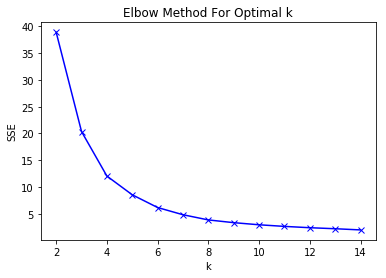

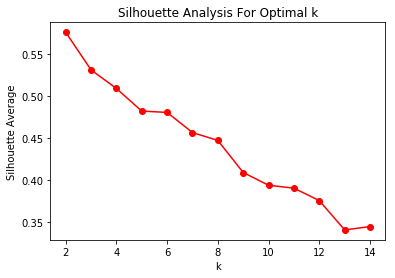

In [10]:
doc2vec_vectors = json.load(open('json_files/doc2vec_vectors','r'))

sse = []
silhouette_avg = []

k_values = range(2,15)
for k in k_values:
    km = KMeans(n_clusters=k)
    km_sse = km.fit(doc2vec_vectors)
    sse.append(km_sse.inertia_)
    km_sil = km_sse.predict(doc2vec_vectors)
    
    silhouette_avg.append(silhouette_score(doc2vec_vectors, km_sil))

plt.plot(k_values, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

plt.plot(k_values, silhouette_avg, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

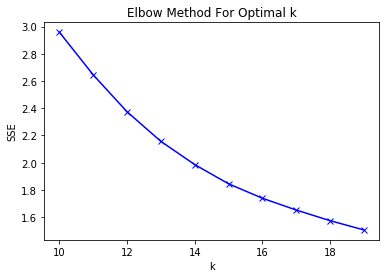

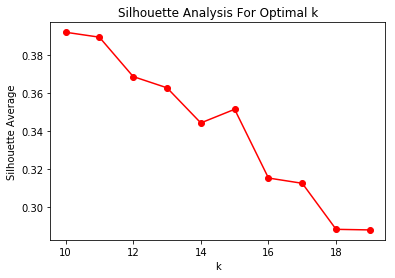

In [2]:
doc2vec_vectors = json.load(open('json_files/doc2vec_vectors','r'))

sse = []
silhouette_avg = []

k_values = range(10,20)
for k in k_values:
    km = KMeans(n_clusters=k)
    km_sse = km.fit(doc2vec_vectors)
    sse.append(km_sse.inertia_)
    km_sil = km_sse.predict(doc2vec_vectors)
    
    silhouette_avg.append(silhouette_score(doc2vec_vectors, km_sil))

plt.plot(k_values, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

plt.plot(k_values, silhouette_avg, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

In [7]:
k = 15

km = KMeans(n_clusters=k)
labels = km.fit_predict(doc2vec_vectors).tolist()
json.dump(labels, open('json_files/cluster_labels','w'))